Top 20 Categories:
   category_combined  average_stars
0      125 / Unknown       4.832374
1      135 / Unknown       4.571822
2      162 / Unknown       4.554726
3      130 / Unknown       4.545314
4      170 / Unknown       4.544674
5       27 / Unknown       4.537446
6      210 / Unknown       4.534963
7      224 / Unknown       4.518045
8      149 / Unknown       4.505405
9      200 / Unknown       4.499774
10     201 / Unknown       4.483999
11     146 / Unknown       4.467868
12     199 / Unknown       4.456028
13      49 / Unknown       4.454075
14     198 / Unknown       4.453975
15     223 / Unknown       4.453781
16     131 / Unknown       4.431364
17      76 / Unknown       4.430791
18      10 / Unknown       4.429446
19     217 / Unknown       4.422952

Bottom 20 Categories:
    category_combined  average_stars
170     184 / Unknown       3.182199
171     148 / Unknown       3.172598
172       9 / Unknown       3.152147
173     157 / Unknown       3.105893
174      55 / Unk

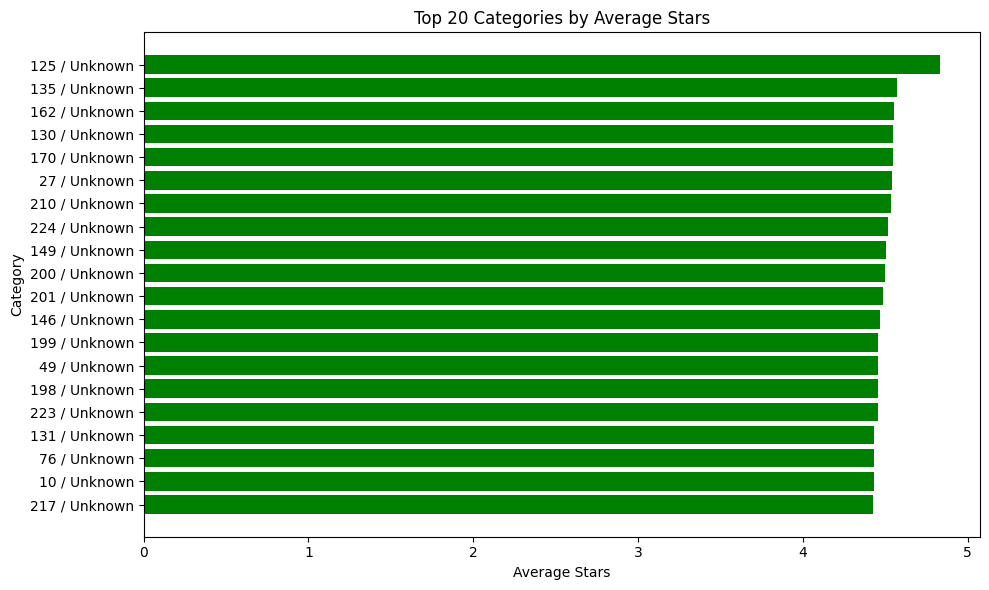

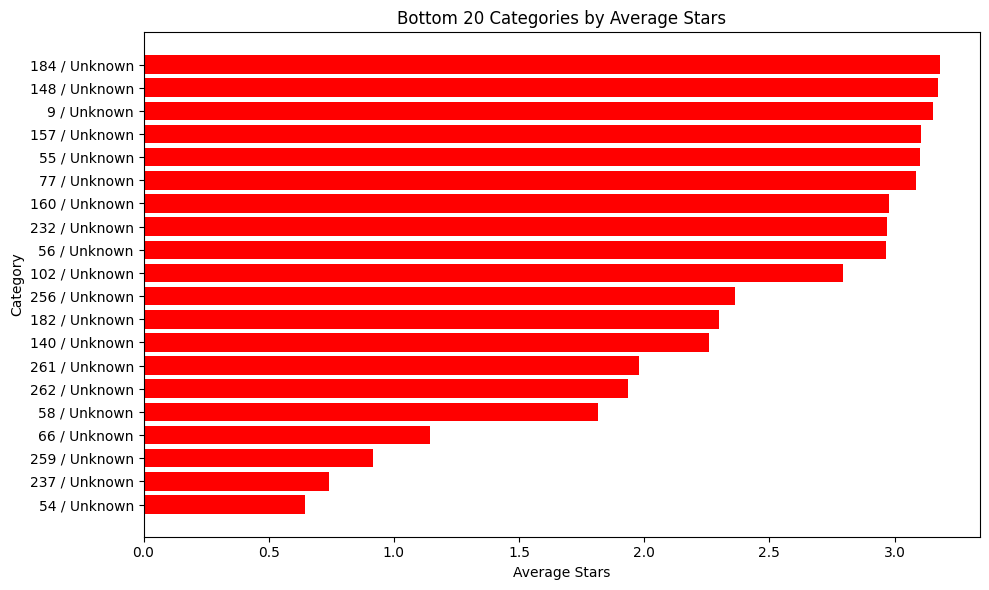

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


products_df = pd.read_csv('amazon_products.csv')
categories_df = pd.read_csv('amazon_categories.csv')


products_df['stars'] = pd.to_numeric(products_df['stars'], errors='coerce')


products_df['category_id'] = products_df['category_id'].astype(str).str.strip()
categories_df['category_name'] = categories_df['category_name'].astype(str).str.strip()


category_ratings = products_df.groupby('category_id')['stars'].mean().sort_values(ascending=False)


category_ratings_df = category_ratings.reset_index()
category_ratings_df.columns = ['category_id', 'average_stars']

merged_df = pd.merge(category_ratings_df, categories_df, left_on='category_id', right_on='category_name', how='left')


merged_df['category_combined'] = merged_df['category_id'] + ' / ' + merged_df['category_name'].fillna('Unknown')


result_df = merged_df[['category_combined', 'average_stars']]


top_20 = result_df.head(20)
bottom_20 = result_df.tail(20)


print("Top 20 Categories:")
print(top_20)

print("\nBottom 20 Categories:")
print(bottom_20)


plt.figure(figsize=(10, 6))
plt.barh(top_20['category_combined'], top_20['average_stars'], color='green')
plt.xlabel('Average Stars')
plt.ylabel('Category')
plt.title('Top 20 Categories by Average Stars')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(bottom_20['category_combined'], bottom_20['average_stars'], color='red')
plt.xlabel('Average Stars')
plt.ylabel('Category')
plt.title('Bottom 20 Categories by Average Stars')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()




Top 20 Categories:
   category_combined  average_stars  average_price
0      125 / Unknown       4.832374      27.273309
1      135 / Unknown       4.571822      15.097565
2      162 / Unknown       4.554726      19.917598
3      130 / Unknown       4.545314      16.563141
4      170 / Unknown       4.544674      26.417577
5       27 / Unknown       4.537446      39.790516
6      210 / Unknown       4.534963      24.457289
7      224 / Unknown       4.518045      22.770535
8      149 / Unknown       4.505405      32.428219
9      200 / Unknown       4.499774      29.037717
10     201 / Unknown       4.483999      26.441353
11     146 / Unknown       4.467868      42.507316
12     199 / Unknown       4.456028      28.855823
13      49 / Unknown       4.454075      20.736743
14     198 / Unknown       4.453975      26.605663
15     223 / Unknown       4.453781      25.669148
16     131 / Unknown       4.431364      19.114025
17      76 / Unknown       4.430791      31.787312
18      10 /

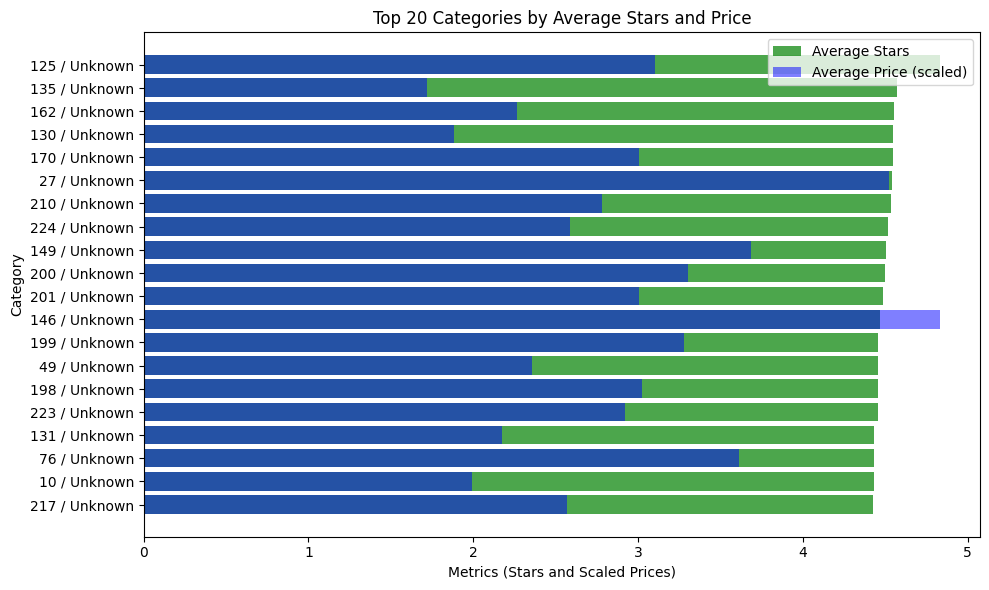

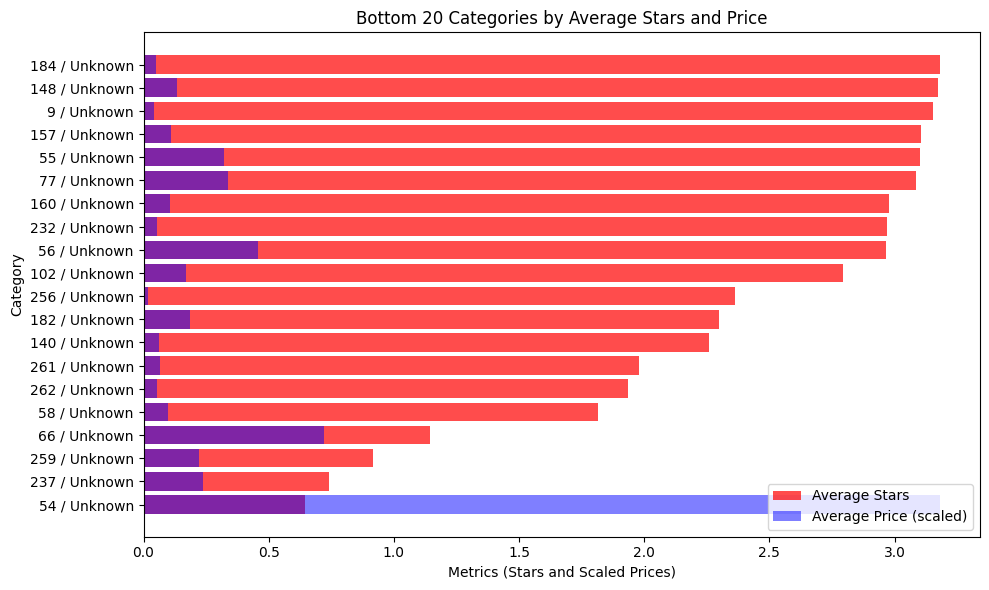

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


products_df = pd.read_csv('amazon_products.csv')
categories_df = pd.read_csv('amazon_categories.csv')

products_df['stars'] = pd.to_numeric(products_df['stars'], errors='coerce')
products_df['price'] = pd.to_numeric(products_df['price'], errors='coerce')


products_df['category_id'] = products_df['category_id'].astype(str).str.strip()
categories_df['category_name'] = categories_df['category_name'].astype(str).str.strip()


category_metrics = products_df.groupby('category_id').agg(
    average_stars=('stars', 'mean'),
    average_price=('price', 'mean')
).sort_values(by='average_stars', ascending=False)

category_metrics_df = category_metrics.reset_index()


merged_df = pd.merge(category_metrics_df, categories_df, left_on='category_id', right_on='category_name', how='left')

merged_df['category_combined'] = merged_df['category_id'] + ' / ' + merged_df['category_name'].fillna('Unknown')


result_df = merged_df[['category_combined', 'average_stars', 'average_price']]


top_20 = result_df.head(20)
bottom_20 = result_df.tail(20)


print("Top 20 Categories:")
print(top_20)

print("\nBottom 20 Categories:")
print(bottom_20)

plt.figure(figsize=(10, 6))
plt.barh(top_20['category_combined'], top_20['average_stars'], color='green', alpha=0.7, label='Average Stars')
plt.barh(top_20['category_combined'], top_20['average_price'] / top_20['average_price'].max() * top_20['average_stars'].max(),
         color='blue', alpha=0.5, label='Average Price (scaled)')
plt.xlabel('Metrics (Stars and Scaled Prices)')
plt.ylabel('Category')
plt.title('Top 20 Categories by Average Stars and Price')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
plt.barh(bottom_20['category_combined'], bottom_20['average_stars'], color='red', alpha=0.7, label='Average Stars')
plt.barh(bottom_20['category_combined'], bottom_20['average_price'] / bottom_20['average_price'].max() * bottom_20['average_stars'].max(),
         color='blue', alpha=0.5, label='Average Price (scaled)')
plt.xlabel('Metrics (Stars and Scaled Prices)')
plt.ylabel('Category')
plt.title('Bottom 20 Categories by Average Stars and Price')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()

In [13]:
import pandas as pd

# Load the data files
products_df = pd.read_csv('amazon_products.csv')
categories_df = pd.read_csv('amazon_categories.csv')

# Ensure 'stars' and 'price' are numeric in case of formatting issues
products_df['stars'] = pd.to_numeric(products_df['stars'], errors='coerce')
products_df['price'] = pd.to_numeric(products_df['price'], errors='coerce')

# Convert both 'category_id' and 'category_name' to strings
products_df['category_id'] = products_df['category_id'].astype(str).str.strip()
categories_df['category_name'] = categories_df['category_name'].astype(str).str.strip()

# Group by category_id to calculate the average stars and average price for each category
category_metrics = products_df.groupby('category_id').agg(
    average_stars=('stars', 'mean'),
    average_price=('price', 'mean')
).sort_values(by='average_stars', ascending=False)

# Reset index to convert to DataFrame
category_metrics_df = category_metrics.reset_index()

# Merge with the categories to get the category names
merged_df = pd.merge(category_metrics_df, categories_df, left_on='category_id', right_on='category_name', how='left')

# Create a combined column for "category id / category name"
merged_df['category_combined'] = merged_df['category_id'] + ' / ' + merged_df['category_name'].fillna('Unknown')

# Select only the relevant columns
result_df = merged_df[['category_combined', 'average_stars', 'average_price']]

# Calculate the correlation between average_price and average_stars
correlation = result_df['average_stars'].corr(result_df['average_price'])

# Print the correlation result
print(f"Correlation between Average Price and Average Stars: {correlation:.4f}")


Correlation between Average Price and Average Stars: -0.4299
